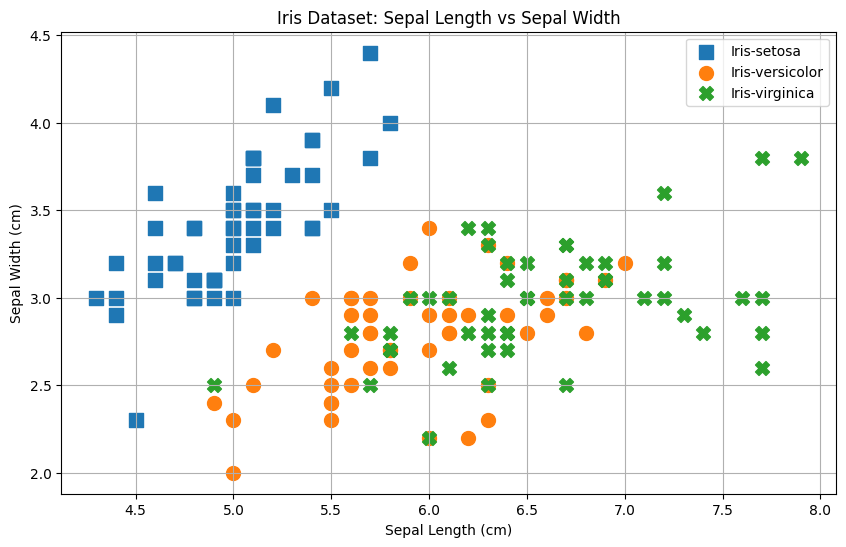

In [1]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load the Iris dataset
data = pd.read_csv('data/iris.csv')

# Drop the 'Id' column and split the dataset into features and labels
data.drop('Id', axis=1, inplace=True)
X = data.drop('Species', axis=1).values
y = data['Species'].values               

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=100, test_size=50, random_state=42)

# Plotting the first two features
plt.figure(figsize=(10, 6))

# Define markers for each species
markers = {'Iris-setosa': 's', 'Iris-versicolor': 'o', 'Iris-virginica': 'X'}

for species in np.unique(y):
    indices = np.where(y == species)[0]
    plt.scatter(X[indices][:, 0],
                X[indices][:, 1],
                label=species, 
                marker=markers[species], 
                s=100)

plt.title('Iris Dataset: Sepal Length vs Sepal Width')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.legend()
plt.grid()
plt.show()

In [2]:
# Manual Gaussian Naïve Bayes implementation
class ManualGaussianNB:
    def fit(self, X, y):
        self.classes = np.unique(y)
        self.mean = {}
        self.var = {}
        self.prior = {}
        
        for cls in self.classes:
            X_cls = X[y == cls]
            self.mean[cls] = X_cls.mean(axis=0)
            self.var[cls] = X_cls.var(axis=0)
            self.prior[cls] = X_cls.shape[0] / X.shape[0]
    
    def predict(self, X):
        posteriors = []
        for cls in self.classes:
            prior = np.log(self.prior[cls])
            likelihood = -0.5 * np.sum(np.log(2 * np.pi * self.var[cls])) \
                         - 0.5 * np.sum(((X - self.mean[cls]) ** 2) / self.var[cls], axis=1)
            posterior = prior + likelihood
            posteriors.append(posterior)
        return self.classes[np.argmax(posteriors, axis=0)]

# Train and predict using Manual Gaussian Naïve Bayes
manual_nb = ManualGaussianNB()
manual_nb.fit(X_train, y_train)
y_pred_manual = manual_nb.predict(X_test)

# Evaluate Manual Gaussian Naïve Bayes
accuracy_manual = accuracy_score(y_test, y_pred_manual)
confusion_manual = confusion_matrix(y_test, y_pred_manual)
report_manual = classification_report(y_test, y_pred_manual)

print("Manual Gaussian NB Accuracy:", accuracy_manual)
print("Manual Gaussian NB Confusion Matrix:\n", confusion_manual)
print("Manual Gaussian NB Classification Report:\n", report_manual)

Manual Gaussian NB Accuracy: 0.96
Manual Gaussian NB Confusion Matrix:
 [[19  0  0]
 [ 0 14  1]
 [ 0  1 15]]
Manual Gaussian NB Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        19
Iris-versicolor       0.93      0.93      0.93        15
 Iris-virginica       0.94      0.94      0.94        16

       accuracy                           0.96        50
      macro avg       0.96      0.96      0.96        50
   weighted avg       0.96      0.96      0.96        50



In [3]:
# Train and predict using sklearn's Gaussian Naïve Bayes
sklearn_nb = GaussianNB()
sklearn_nb.fit(X_train, y_train)
y_pred_sklearn = sklearn_nb.predict(X_test)

# Evaluate Sklearn Gaussian Naïve Bayes
accuracy_sklearn = accuracy_score(y_test, y_pred_sklearn)
confusion_sklearn = confusion_matrix(y_test, y_pred_sklearn)
report_sklearn = classification_report(y_test, y_pred_sklearn)

print("Sklearn Gaussian NB Accuracy:", accuracy_sklearn)
print("Sklearn Gaussian NB Confusion Matrix:\n", confusion_sklearn)
print("Sklearn Gaussian NB Classification Report:\n", report_sklearn)

Sklearn Gaussian NB Accuracy: 0.96
Sklearn Gaussian NB Confusion Matrix:
 [[19  0  0]
 [ 0 14  1]
 [ 0  1 15]]
Sklearn Gaussian NB Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        19
Iris-versicolor       0.93      0.93      0.93        15
 Iris-virginica       0.94      0.94      0.94        16

       accuracy                           0.96        50
      macro avg       0.96      0.96      0.96        50
   weighted avg       0.96      0.96      0.96        50

